
# Regression in Convolution Neural Network Applied to Plant Leaf Counting

## Using the InceptionResNetV2 Architecture







**Importing the Librarys for to Use at Convolution Neural Network**
*   **numpy:** import the numpy library for make some scientif calcul
*   **os & csv:** import the os and csv to open our dataset
*   **skimage:** import the skimage library for make manipulation in image.
*   **matplotlib.pyplot:** import the matplotlib to show the result of experiments.

In [0]:
import numpy as np
import os
import csv 
from skimage import io, transform
import matplotlib.pyplot as plt

**Import the colab to mount**

**NOTE: If you not have GPU in you computer, I recomend upload your dataset to Google Drive and run in Colab**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/



**Creating OpenCsv Function, OpenImage Function, and map_classes to get the dataset**




In [0]:

def openCsv(wayFile):
    way_classes = []
    way_datas = []
    
    count = 0
    
    with open(wayFile, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            way_datas.append(row[0])
            way_classes.append(int(row[1]))
    return way_datas, way_classes
  
def openImage(way_path, way_image, width, height):
    X = []
    for i in range(0, len(way_image)):
        img = io.imread('%s%s' % (way_path, way_image[i]))
        img = img[...,:3]
        img = transform.resize(img,(width, height))
        X.append(img)
    return X
  
def map_classes(way_classes):
    m = {}
    y = np.zeros(len(way_classes))
    uc = np.unique(way_classes)
    
    for i in range(0, len(uc)):
        m[uc[i]] = i
    
    for i in range(0, len(way_classes)):
        y[i] = m[way_classes[i]]
        
    return y, m, uc



**Run the function openCSV, openImage, and map_classes**

**Note: The each image have the 299 by 299 (width and height).




In [5]:
#set the width and height of image
width = 299
height = 299


way_path = '/content/drive/My Drive/ColabNotebooks/A1_A2_A3_A4/'
way_image, way_classes = openCsv('/content/drive/My Drive/ColabNotebooks/A1_A2_A3_A4.csv')
X_datas = openImage(way_path, way_image, width, height)
#y_layers, m, uc = map_classes(way_classes)
y_layers = way_classes
X_datas = np.asarray(X_datas)
y_layers = np.asarray(y_layers)


print(y_layers.shape)
print(y_layers)

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(810,)
[15 11 15 15 12 14 15 16 11 13 16 16 13 14 16 14 15 18 14 14 20 19 16 15
 17 15 14 18 18 16 15 20 19 18 17 18 19 15 15 18 17 17 14 18 18 15 17 16
 20 17 18 16 16 17 15 14 18 18 16 15 18 15 15 16 19 19 15 17 19 15 14 18
 17 15 18 16 15 16 17 19 17 16 17 15 15 17 17 16 15 18 15 18 16 19 19 16
 16 17 15 15 18 16 15 19 18 15 17 16 18 20 16 15 17 15 15 16 17 16 14 19
 18 14 16 16 18 17 18 16  5  4  3  4  5  7  4  5  6  8  5  7  7  9  8  9
  9 12 10  9 11 14 12 12 11 15 12 15 18 15 16  4  4  6  7  7  7  3  5  6
  7  9  9  2  4  5  7  2  3  5  6  2  3  6  6  7  7  7  7  7  7  6  7  7
  4  7  6  7  5  7  7  7  8  5  7  6  6  7  7  7  7  5  7  7  5  6  6  7
  5  7  7  7  8  6  7  6  6  7  7  8  6  6  7  7  5  6  6  8  4  7  7  8
  8  6  7  7  7  8  7  7  7  6  7  7  4  7  7  8  5  7  7  8  9  7  8  8
  7  8  7  8  7  7  7  7  5  8  7  8  7  8  8  8  9  6  8  8  7  8  8  9
  8  7  8  8  8  9  7  9  7  8  9  9 10  6  9  9  8  9 10 11  9  8 10 11
  9  9  7 11  8  9 10  9 10  8 10 10  8 10  

**Import the keras library for adapt InceptionResNetV2 to Regression**


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD, Adam

Using TensorFlow backend.



**Split the Dataset in train/dev/test using Skelearn library.**

**NOTE: The coresponding number of image is train: 518, dev: 162, and test: 130)**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_datas, y_layers, test_size=0.20, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

#x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2]))
#x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1], x_val.shape[2]))

#y_train = np_utils.to_categorical(y_train, len(uc))
#Y_test = np_utils.to_categorical(y_test, len(uc))
#y_val = np_utils.to_categorical(y_val, len(uc))

print(X_datas.shape)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
#print(np.asarray(range(len(uc))))
#print(y_val[0,:])

(810, 299, 299, 3)
(518, 299, 299, 3)
(162, 299, 299, 3)
(130, 299, 299, 3)


## Adapting the InceptionResNetV2 Architecture to Regression Problems

In [8]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Model
model = InceptionResNetV2(weights='imagenet', include_top=True, input_shape=(299, 299, 3))
x = model.get_layer(index=len(model.layers)-2).output

print(x)
x= Dense(1)(x)
model = Model(inputs=model.input, outputs=x)
model.summary()

225222656/225209952 [==============================] - 6s 0us/step
Tensor("avg_pool/Mean:0", shape=(?, 1536), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalizatio

**Using RMSprop optimizer, mean absolute error with metrics, and mean square erro with loss**

In [0]:
opt = RMSprop(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

**Puting the model for fit**

**NOTE: The number of epochs is set to 100**

In [10]:
network_history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data= (x_val, y_val))

Train on 518 samples, validate on 130 samples
Epoch 1/100
518/518 [==============================] - 87s 168ms/step - loss: 98.7752 - mean_absolute_error: 9.1501 - val_loss: 35.1839 - val_mean_absolute_error: 5.1867
Epoch 2/100
518/518 [==============================] - 47s 90ms/step - loss: 25.3578 - mean_absolute_error: 4.5009 - val_loss: 11.6364 - val_mean_absolute_error: 2.6975
Epoch 3/100
518/518 [==============================] - 47s 91ms/step - loss: 10.5899 - mean_absolute_error: 2.8268 - val_loss: 7.1288 - val_mean_absolute_error: 2.0979
Epoch 4/100
518/518 [==============================] - 47s 91ms/step - loss: 4.2263 - mean_absolute_error: 1.7127 - val_loss: 13.3410 - val_mean_absolute_error: 2.4902
Epoch 5/100
518/518 [==============================] - 47s 91ms/step - loss: 2.6940 - mean_absolute_error: 1.3233 - val_loss: 12.9513 - val_mean_absolute_error: 3.0459
Epoch 6/100
518/518 [==============================] - 47s 91ms/step - loss: 3.1348 - mean_absolute_error: 1.30

### Save the model trained


In [0]:
model.save('/content/drive/My Drive/ColabNotebooks/Inception/modelInception.h5')

### Load the Mordel

In [0]:
from keras.models import load_model

#model = load_model('/content/drive/My Drive/ColabNotebooks/AllmodeloRMSprop.h5')

model = load_model('/content/drive/My Drive/ColabNotebooks/Inception/modelInception.h5')

## Predict the Model Trained

**Show the three better images and the three wrong image of the test set**

162/162 [==============================] - 8s 50ms/step
135
74
130
	As tres imagens que estao piores preditas


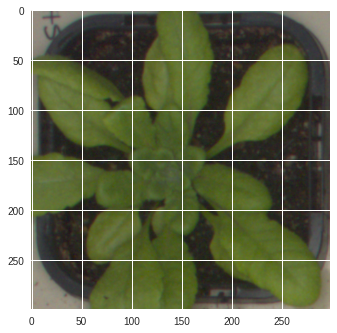

('Ground Truth: ', 23)
('Prediceted: ', 26.716059)


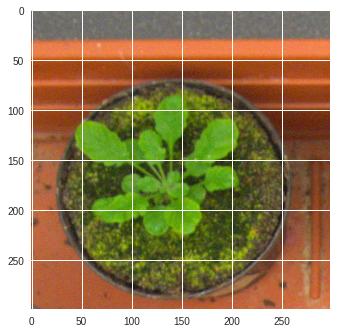

('Ground Truth: ', 18)
('Prediceted: ', 15.219174)


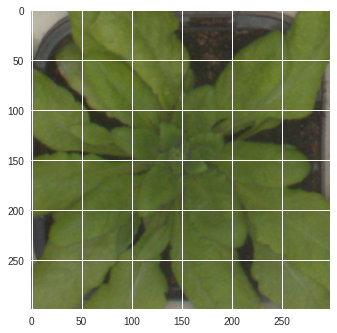

('Ground Truth: ', 28)
('Prediceted: ', 30.130838)
	As tres imagens que estao melhores preditas


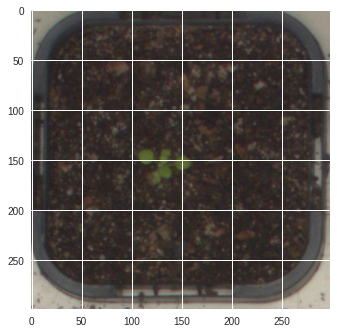

('Ground Truth: ', 7)
('Prediceted: ', 6.9709682)


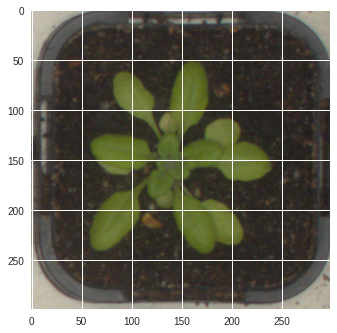

('Ground Truth: ', 17)
('Prediceted: ', 16.96899)


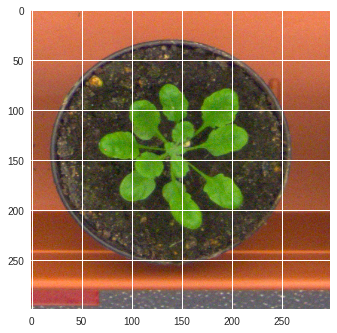

('Ground Truth: ', 16)
('Prediceted: ', 15.959335)


In [12]:

predictTest = model.predict(x_test, verbose=1)
predictTest = predictTest.reshape(predictTest.shape[0])

mae = np.abs(y_test - predictTest)
#print(mae)
pos = np.argsort(mae)

print(pos[-1])
print(pos[-2])
print(pos[-3])

#As três imagens piores preditas.
print("\tAs tres imagens que estao piores preditas")
img1 = plt.imshow(x_test[pos[-1]], interpolation='none')
plt.show()
print("Ground Truth: ",y_test[pos[-1]])
print("Prediceted: ",predictTest[pos[-1]])

img2 = plt.imshow(x_test[pos[-2]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[-2]])
print("Prediceted: ",predictTest[pos[-2]])

img3 = plt.imshow(x_test[pos[-3]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[-3]])
print("Prediceted: ",predictTest[pos[-3]])

#As três imagens que estao melhores preditas.
print("\tAs tres imagens que estao melhores preditas")
img1 = plt.imshow(x_test[pos[1]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[1]])
print("Prediceted: ",predictTest[pos[1]])

img2 = plt.imshow(x_test[pos[2]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[2]])
print("Prediceted: ",predictTest[pos[2]])

img3 = plt.imshow(x_test[pos[3]], interpolation='nearest')
plt.show()
print("Ground Truth: ",y_test[pos[3]])
print("Prediceted: ",predictTest[pos[3]])




**Predict of train set**

In [13]:
predictTrain = model.predict(x_train, verbose=1)
predictTrain = predictTrain.reshape(predictTrain.shape[0])
#predictTrain = predictTrain.astype('int32')
print(x_train.shape)
print(predictTrain.shape)
print(y_train.shape)
print(np.round(predictTrain))
print(y_train)

518/518 [==============================] - 13s 25ms/step
(518, 299, 299, 3)
(518,)
(518,)
[16.  8. 11.  9. 16. 10.  5. 12.  7.  4. 10. 12.  7. 11.  6.  4. 20.  5.
 13.  8.  7. 28. 18.  8. 11. 30. 18. 10.  8. 17.  7. 12. 16. 16.  9.  9.
 15. 17. 13.  9. 15. 15. 10. 16.  7.  2. 10.  4. 17.  5. 12.  9.  7.  6.
 17. 17. 18. 11. 10. 20.  7. 18. 17.  8. 15. 20. 15. 12. 14.  8. 20.  8.
 21. 12.  9. 18.  8.  7. 11. 17. 16. 18. 11. 16. 22. 15. 25.  8.  6. 13.
 13. 19. 15. 12. 22. 22. 20.  9. 10. 16. 13. 14.  6. 10. 19. 13. 17. 18.
 15.  8. 16. 17. 18. 22.  8. 10. 16.  7. 17.  6.  8.  3. 13. 18. 14. 22.
 25.  9. 14. 27. 19. 33.  9.  7. 15. 19. 10.  7. 13.  6. 17. 20. 11. 10.
 12. 12. 16.  8. 10. 15. 25. 15. 29. 13.  8. 18. 14.  7. 10.  9. 16. 12.
  9. 13.  4. 12. 12. 14. 18. 25. 19. 13. 15. 11. 14. 21. 11.  7. 23. 20.
 12. 16. 30.  9. 14.  4.  7. 24.  6. 11. 20.  6. 18. 18. 15. 11. 17. 17.
 15.  9.  8.  9.  7. 18. 10.  6.  8. 12.  8.  9. 14.  8. 18.  8. 13. 10.
 12. 29. 19. 10.  8.  6.  7.  7. 1

**Predicted of dev set**

In [14]:
predictVal = model.predict(x_val, verbose=1)
predictVal = predictVal.reshape(predictVal.shape[0])
#predictVal = predictVal.astype('int32')
print(x_val.shape)
print(predictVal.shape)
print(y_val.shape)
print(np.round(predictVal))
print(y_val)

130/130 [==============================] - 3s 25ms/step
(130, 299, 299, 3)
(130,)
(130,)
[11. 12. 10. 20.  7.  7. 15.  7.  9.  5. 15.  7. 18. 28. 21.  7.  7. 26.
 15. 16. 14. 12. 14.  4. 21. 13.  9.  3.  8. 10.  7. 17. 12.  7. 14. 15.
 14.  6. 19. 11. 16. 12. 21. 10. 14.  9.  5. 15.  9.  6. 17. 10.  3. 13.
  5. 10. 19.  7. 15. 17.  7. 17. 16.  6. 17.  9.  9.  5.  7. 14.  8. 18.
 14. 12.  9.  8. 17.  9. 18. 18. 10. 17.  6. 14. 11. 19. 16. 14. 19. 27.
 13. 18. 10. 18. 22.  4. 17. 12.  6. 24.  7. 14. 20. 15. 20. 17.  9. 12.
 31. 15. 14.  9. 11. 11. 18.  2. 12.  6. 21. 11. 11. 12. 18. 23.  7. 10.
 16. 11.  8.  7.]
[11 13 11 20  7  7 16  7  9  8 15  8 18 26 22  7  7 25 15 19 15 13 15  5
 21 14  8  2  8 11  7 17 14  6 15 15 14  6 19 11 15 12 20  9 14 10  4 16
  9  7 18 11  4 12  5 11 20  9 16 14  7 18 16  6 16  9 15  5  7 15  8 18
 14 12  9  8 19  9 19 19 10 17 10 15 13 18 16 14 18 27 14 17  9 19 23  3
 17 13  7 23  7 14 20 15 19 18  9 12 31 15 12  9 13 12 18  2 12  7 17 11
 12 12 19 23  7 1

### Using Metrics R^2, MAE, and MSE for evaluat the train/dev/test set

**R², MAE and MSE for Train Set**

In [19]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

y_true = y_train
predict = predictTrain

r2 = r2_score(y_true, predict)
mae = median_absolute_error(y_true, predict)
mse = mean_squared_error(y_true, predict)

print("MSE\t MAE\t R2")
print("%f\t& %f\t& %f \hline", (mse, mae, r2))

MSE	 MAE	 R2
('%f\t& %f\t& %f \\hline', (0.16029293386368743, 0.28113460540771484, 0.9949998074595644))


**R², MAE and MSE for Dev Set**

In [17]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

y_true = y_val
predict = predictVal

r2 = r2_score(y_true, predict)
mae = median_absolute_error(y_true, predict)
mse = mean_squared_error(y_true, predict)

print("MSE\t MAE\t R2")
print("%s\t& %s\t& %s \hline", (mse, mae, r2))

MSE	 MAE	 R2
('%s\t& %s\t& %s \\hline', (1.4155011531143027, 0.5350208282470703, 0.9531019018678655))


#### **R², MAE and MSE for Test Set**

**R² score**

In [26]:
from sklearn.metrics import r2_score

y_true = y_test
predict = predictTest

r2_score(y_true, predict)


0.9751240045793762

**MAE score**

In [27]:
from sklearn.metrics import median_absolute_error

y_true = y_test
predict = predictTest

median_absolute_error(y_true, predict)

0.5395636558532715

**Mean Squared Error -- score**

In [28]:
from sklearn.metrics import mean_squared_error


y_true = y_test
predict = predictTest

mean_squared_error(y_true, predict)  


0.7806127931982902

### Implementing the Scatter Graphics to plot the Coefficient of Determination

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  app.launch_new_instance()


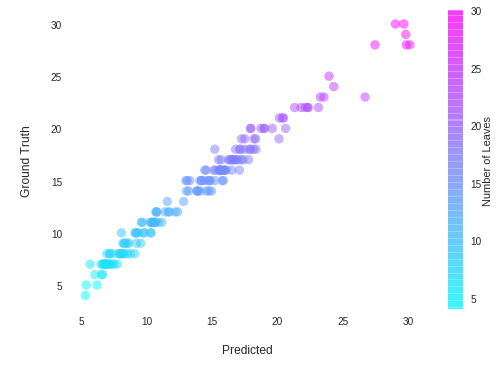

In [29]:
import matplotlib.pyplot as plt


N = y_test.shape
x = predictTest
y = y_test
colors = y_test
#area = np.pi * (10 * np.random.rand(162))**2  # 0 to 15 point radii
area = 80
#plt.title("\nResult of Predict -- InceptionResNet\n", fontsize=25)
plt.xlabel("\nPredicted\n", fontsize=12)
plt.ylabel("\nGround Truth\n", fontsize=12)
marker_size=15
#plasma viridis hot
plt.scatter(x, y, s=area, c=colors, cmap='cool', alpha=0.5)
plt.gca().set_axis_bgcolor('white')

cbar= plt.colorbar()
cbar.set_label("Number of Leaves", labelpad=+1)

plt.show()


